In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import sys

In [52]:
class MicroclimateParamValueGenerator:
    
    def __init__(self, min_param_value, max_param_value, mean_param_value):
        
        self.min_value = min_param_value
        self.max_value = max_param_value
        self.mean_value = mean_param_value
        
    def generate_value(self,anomaly_set, std):
        
    # create generated value and anomaly value
        anomaly = np.random.choice(anomaly_set)
        generated_value = np.random.normal(self.mean_value, std)
    
    #for simple anomaly
        if anomaly == 0.1:
            if np.random.choice(2) == 0:
                anomaly_value = generated_value + (generated_value * 0.1)
            else:
                anomaly_value = generated_value - (generated_value * 0.1)
            return anomaly_value
        
    #for medium anomaly
        elif anomaly == 0.001:
            if np.random.choice(2) == 0:
                anomaly_value = generated_value + (generated_value * 0.35)
            else:
                anomaly_value = generated_value - (generated_value * 0.35)
            return anomaly_value
        
    #for critcital anomaly
        elif anomaly == 0.0001:
            if np.random.choice(2) == 0:
                anomaly_value = generated_value + (generated_value * 0.9)
            else:
                anomaly_value = generated_value - (generated_value * 0.9)
            return anomaly_value
        
    #for normal values
        else:
            return generated_value

In [53]:
anomaly = [0] * 10000 + [0.1] * 1000 + [0.001] * 100 + [0.0001] * 10

In [54]:
temperature_obj = MicroclimateParamValueGenerator(18, 25, 20)
humidity_obj = MicroclimateParamValueGenerator(40, 60, 35)
co2_obj = MicroclimateParamValueGenerator(50, 1000, 350)

In [63]:
data = list()

date_df = pd.DataFrame(pd.date_range(start = pd.Timestamp('2023-01-01 00:00:00'), 
                               end = pd.Timestamp('2023-12-30 00:00:00'),
                               freq = '1H'))

for i in range(date_df.__len__()):
    data.append([temperature_obj.generate_value(std = 2, anomaly_set = anomaly),
                 humidity_obj.generate_value(std = 2, anomaly_set = anomaly), 
                 co2_obj.generate_value(std = 2, anomaly_set = anomaly)])
    

values_df = pd.DataFrame(data)

In [64]:
params_df = pd.concat([date_df.rename(columns = {0: 'Date'}), 
                       values_df.rename(columns = {0: 'Temperature', 1: 'Humidity', 2: 'CO2'})], 
                       axis = 1).reset_index(drop = True)

In [57]:
params_df

,Date,Temperature,Humidity,CO2
0,2023-01-01 00:00:00,22.805526,30.955483,385.316818
1,2023-01-01 01:00:00,15.538725,33.901785,350.299767
2,2023-01-01 02:00:00,19.561931,34.100467,351.669028
3,2023-01-01 03:00:00,20.552993,32.283270,345.099289
4,2023-01-01 04:00:00,20.016237,33.160259,349.929111
...,...,...,...,...
8708,2023-12-29 20:00:00,21.376420,33.403206,348.569484
8709,2023-12-29 21:00:00,20.425684,37.711263,382.706546
8710,2023-12-29 22:00:00,20.032192,34.018335,349.562587
8711,2023-12-29 23:00:00,20.694287,37.273426,352.108841


<Axes: >

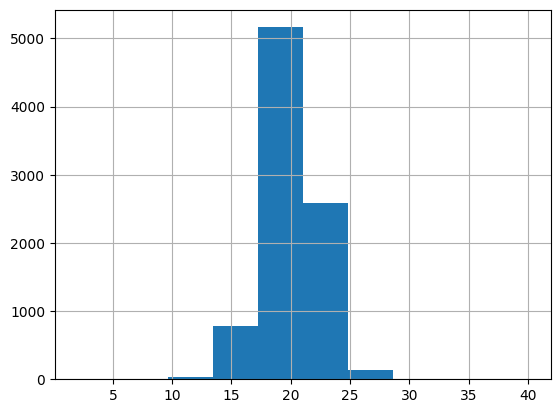

In [58]:
params_df['Temperature'].hist()

<Axes: >

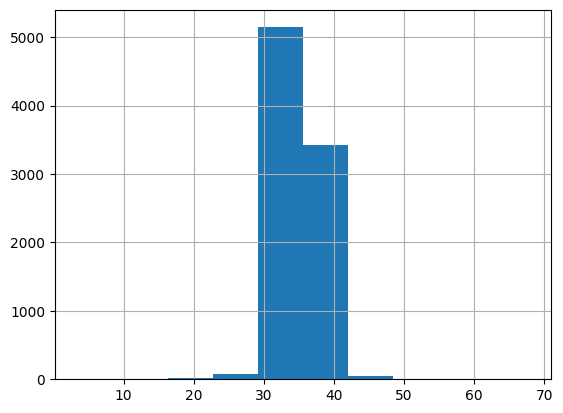

In [59]:
params_df['Humidity'].hist()

<Axes: >

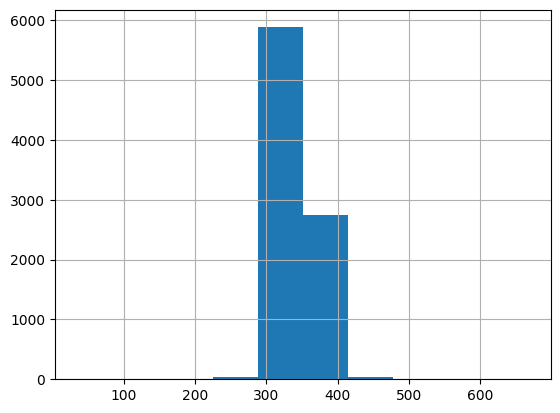

In [60]:
params_df['CO2'].hist()